In [ ]:
Problem statement.

Build a recommender system by using cosine simillarties score.


In [1]:
import pandas as pd
import numpy as np

In [2]:
book_df= pd.read_csv("book.csv",encoding=('ISO-8859-1'))

In [3]:
book_df[0:5]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
book_df=book_df.drop('Unnamed: 0',axis=True)

In [5]:
book_df=book_df.rename({'User.ID':'userid','Book.Title':'booktitle','Book.Rating':'bookrating'},axis=1)
book_df

,userid,booktitle,bookrating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
len(book_df.userid.unique())

2182

In [7]:
len(book_df.booktitle.unique())

9659

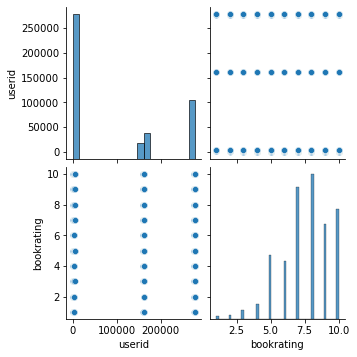

In [8]:
import seaborn as sns
sns.pairplot(book_df)

In [9]:
user_book_df=book_df.pivot_table(index='userid', columns='booktitle', values='bookrating',aggfunc='mean').reset_index(drop=True)


In [10]:
user_book_df

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
user_book_df = book_df.groupby(['userid', 'booktitle'])['bookrating'].mean().unstack()
user_book_df

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [12]:
user_book_df.index = book_df.userid.unique()

In [13]:
user_book_df

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
user_book_df.fillna(0, inplace=True)

In [15]:
user_book_df

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [17]:
user_sim= 1 - pairwise_distances( user_book_df.values,metric='cosine')

In [18]:
user_sim= 1 - pairwise_distances( user_book_df.values,metric='correlation')

In [18]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [20]:
#Set the index and column names to user ids 
user_sim_df.index = book_df.userid.unique()
user_sim_df.columns = book_df.userid.unique()

In [21]:
user_sim_df.iloc[0:50, 0:50]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,276853,276854,276857,276859,276861,276862,276863,276866,276870,276872
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:50, 0:50]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,276853,276854,276857,276859,276861,276862,276863,276866,276870,276872
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:50]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
276755    276726
276760    276726
276762    276726
276768    276726
276772      1491
276774    278543
276780    276726
276786    276726
276788    276726
276796    276726
276798    276726
276800    276726
276804    276726
276808    276726
276811    276726
276812    277533
276813      3546
276814    277828
276820      3462
276822    276726
276827    276726
276828    276726
276830    276726
276832    276726
276835    276726
276837    276726
276842    276726
276847    276726
276848    276726
276850    276726
276853    276726
276854    276726
276857    276726
276859    276726
276861    276726
276862    277556
276863    276726
276866    276726
276870    276726
276872    276726
dtype: int64

In [24]:
book_df[(book_df['userid']==276813 ) | (book_df['userid']==3546)]

,userid,booktitle,bookrating
44,276813,Icebound,8
45,276813,I'll Be Seeing You,8
46,276813,From the Corner of His Eye,6
47,276813,Isle of Dogs,8
48,276813,Purity in Death,6
49,276813,This Year It Will Be Different: And Other Stories,6
50,276813,Proxies,8
6781,3546,Dance the Eagle to Sleep,8


In [25]:
user_1=book_df[book_df['userid']==276872]

In [26]:
user_2=book_df[book_df['userid']==161677]

In [27]:
user_1.booktitle

156                           Through Wolf's Eyes (Wolf)
157                              Puerto Vallarta Squeeze
158                               Tree Grows In Brooklyn
159    Cybill Disobedience: How I Survived Beauty Pag...
160                                          Snow Angels
161                                        Wish You Well
162                 The Hitchhiker's Guide to the Galaxy
163                  Crow Lake (Today Show Book Club #7)
Name: booktitle, dtype: object

In [28]:
user_2.booktitle

9190                             The Biggest Pumpkin Ever
9191    The Twelve Dancing Princesses: A Folk Tale fro...
9192                                         Do You Know?
9193               The good-by day (A Little golden book)
9194           Pooh Trick or Treat! (Little Golden Books)
9195                           Cookie Monster/Cookie Tree
9196    My Little Golden Book of Cars and Trucks (Litt...
9197    I Think That It is Wonderful: Featuring Jim He...
9198                                Grover's Own Alphabet
9199     Best Little Word Book Ever! (Little Golden Book)
9200      Busiest Firefighters Ever! (Little Golden Book)
9201                  The Monster at the End of This Book
9202                                             Kat Kong
9203                             IF YOU'RE AFRAID OF DARK
Name: booktitle, dtype: object

In [29]:
pd.merge(user_1,user_2,on='booktitle',how='outer')

,userid_x,booktitle,bookrating_x,userid_y,bookrating_y
0,276872.0,Through Wolf's Eyes (Wolf),8.0,NaN,NaN
1,276872.0,Puerto Vallarta Squeeze,8.0,NaN,NaN
2,276872.0,Tree Grows In Brooklyn,7.0,NaN,NaN
3,276872.0,Cybill Disobedience: How I Survived Beauty Pag...,4.0,NaN,NaN
4,276872.0,Snow Angels,3.0,NaN,NaN
5,276872.0,Wish You Well,10.0,NaN,NaN
6,276872.0,The Hitchhiker's Guide to the Galaxy,8.0,NaN,NaN
7,276872.0,Crow Lake (Today Show Book Club #7),8.0,NaN,NaN
8,NaN,The Biggest Pumpkin Ever,NaN,161677.0,8.0
9,NaN,The Twelve Dancing Princesses: A Folk Tale fro...,NaN,161677.0,9.0


In [ ]:
#Alternative Method:
(Recommending Similar Movies)

In [31]:
book_df.groupby('booktitle')['bookrating'].mean().sort_values(ascending=False).head()

booktitle
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
Name: bookrating, dtype: float64

In [32]:
book_df.groupby('booktitle')['bookrating'].count().sort_values(ascending=False).head()


booktitle
Fahrenheit 451                                     5
Vanished                                           4
Charlie and the Chocolate Factory                  4
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Name: bookrating, dtype: int64

In [33]:
ratings = pd.DataFrame(book_df.groupby('booktitle')['bookrating'].mean())
ratings.head()

,bookrating
booktitle,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [34]:
ratings['num of ratings'] = pd.DataFrame(book_df.groupby('booktitle')['bookrating'].count())
ratings.head()

,bookrating,num of ratings
booktitle,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


<AxesSubplot:>

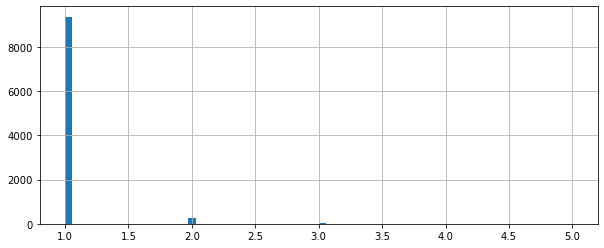

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

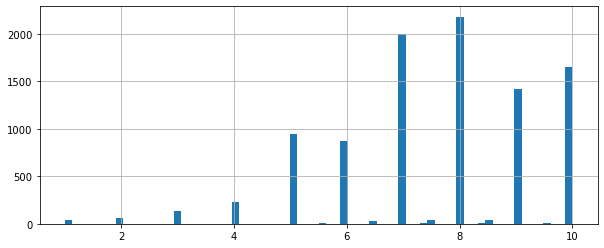

In [36]:
plt.figure(figsize=(10,4))
ratings['bookrating'].hist(bins=70)

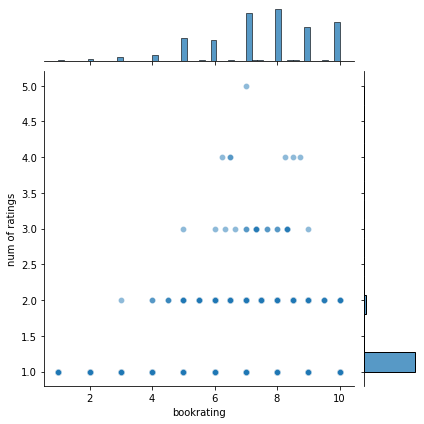

In [37]:
sns.jointplot(x='bookrating',y='num of ratings',data=ratings,alpha=0.5)

In [38]:
moviemat =book_df.pivot_table(index='userid',columns='booktitle',values='bookrating')
moviemat.head

<bound method NDFrame.head of booktitle   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
userid                                                                        
8                           NaN                                         NaN   
9                           NaN                                         NaN   
10                          NaN                                         NaN   
12                          NaN                                         NaN   
14                          NaN                                         NaN   
...                         ...                                         ...   
278846                      NaN                                         NaN   
278849                      NaN                                         NaN   
278851                      NaN                                         NaN   
278852                      NaN                                         NaN   
278854                

In [39]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,bookrating,num of ratings
booktitle,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


In [40]:
ratings.head(15)

,bookrating,num of ratings
booktitle,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,7.0,1
01-01-00: A Novel of the Millennium,10.0,1
"1,401 More Things That P*Ss Me Off",10.0,1
10 Commandments Of Dating,7.0,1


In [41]:
stardust_user_ratings = moviemat['Stardust']
theamber_user_ratings = moviemat['The Amber Spyglass (His Dark Materials, Book 3)']
stardust_user_ratings.head()

userid
8    NaN
9    NaN
10   NaN
12   NaN
14   NaN
Name: Stardust, dtype: float64

In [42]:
similar_to_stardust = moviemat.corrwith(stardust_user_ratings)
similar_to_theamber= moviemat.corrwith(theamber_user_ratings)

C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [43]:
corr_stardust = pd.DataFrame(similar_to_stardust,columns=['Correlation'])
corr_stardust.dropna(inplace=True)
corr_stardust

,Correlation
booktitle,
Stardust,1.0


In [44]:
corr_stardust.sort_values('Correlation',ascending=False).head()

,Correlation
booktitle,
Stardust,1.0


In [45]:
corr_stardust = corr_stardust.join(ratings['num of ratings'])
corr_stardust

,Correlation,num of ratings
booktitle,,
Stardust,1.0,4


In [46]:
corr_stardust[corr_stardust['num of ratings']>3].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
booktitle,,
Stardust,1.0,4


In [47]:
corr_theamber = pd.DataFrame(similar_to_theamber,columns=['Correlation'])


In [48]:
corr_theamber.dropna(inplace=True)

In [49]:
corr_theamber = corr_theamber.join(ratings['num of ratings'])
corr_theamber

,Correlation,num of ratings
booktitle,,
"The Amber Spyglass (His Dark Materials, Book 3)",1.000000,4
"The Golden Compass (His Dark Materials, Book 1)",1.000000,3
"The Subtle Knife (His Dark Materials, Book 2)",0.987829,4


In [50]:
corr_theamber[corr_theamber['num of ratings']>3].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
booktitle,,
"The Amber Spyglass (His Dark Materials, Book 3)",1.000000,4
"The Subtle Knife (His Dark Materials, Book 2)",0.987829,4


In [ ]:
conclusion:
    we can conclude that, both The Amber Spyglass (His Dark Materials, Book 3) and Stardust have same ratings.